In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from sklearn.model_selection import train_test_split



from sklearn.model_selection import StratifiedShuffleSplit

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg' 

In [2]:

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
df2=pd.read_csv("rhythm.csv",header=None)

In [3]:
df=df2

dfp=df[2:79837]
dfp

,0,1,2,3,4,5,6,7,8,9,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200
2,1.0,0.0,3.468788,3.246612,2.925692,2.592429,2.308538,1.975275,1.567953,1.185318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,3.456445,3.184897,2.802261,2.481341,2.185107,1.864187,1.506238,1.160632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,3.407072,3.370043,3.110838,2.740546,2.419626,2.160421,1.888873,1.469209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,3.370043,3.110838,2.765232,2.456655,2.222137,1.962932,1.691384,1.321092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.0,0.0,3.505817,3.221926,2.925692,2.617115,2.382597,2.098706,1.703727,1.321092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,0.0,3.431759,3.184897,2.876320,2.617115,2.419626,2.172764,1.851844,1.444522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,7.0,0.0,3.530503,3.271298,2.901006,2.580086,2.394940,2.185107,1.839501,1.432179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,8.0,0.0,3.530503,3.407072,3.086152,2.728203,2.456655,2.246823,2.024647,1.740756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,9.0,0.0,3.653934,3.382386,3.012094,2.654144,2.357910,2.098706,1.716070,1.308749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,10.0,0.0,3.567532,3.518160,3.246612,2.851634,2.555400,2.333224,2.074020,1.642012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:


target=dfp.iloc[:,1]
print(dfp.shape)
data=dfp.iloc[:,2:3201]



(79835, 3201)


different class data counts 0.0     53029
2.0     11673
11.0     3987
4.0      3543
12.0     1815
3.0      1461
6.0      1453
5.0       847
9.0       494
7.0       484
8.0       463
13.0      321
10.0      143
1.0       122
Name: 1, dtype: int64


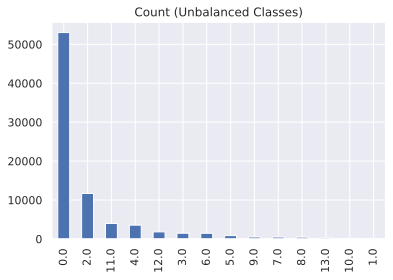

In [5]:
print("different class data counts",target.value_counts())
target.value_counts().plot(kind='bar', title='Count (Unbalanced Classes)');



In [6]:
from sklearn.utils import resample
df_1=df[df.iloc[:,1]==1]
df_2=df[df.iloc[:,1]==2]
df_3=df[df.iloc[:,1]==3]
df_4=df[df.iloc[:,1]==4]
df_5=df[df.iloc[:,1]==5]
df_6=df[df.iloc[:,1]==6]
df_7=df[df.iloc[:,1]==7]
df_8=df[df.iloc[:,1]==8]
df_9=df[df.iloc[:,1]==9]
df_10=df[df.iloc[:,1]==10]
df_11=df[df.iloc[:,1]==11]
df_12=df[df.iloc[:,1]==12]
df_13=df[df.iloc[:,1]==13]
df_0=(df[df.iloc[:,1]==0]).sample(n=200,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=200,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=200,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=200,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=200,random_state=126)
df_5_upsample=resample(df_5,replace=True,n_samples=200,random_state=127)
df_6_upsample=resample(df_6,replace=True,n_samples=200,random_state=128)
df_7_upsample=resample(df_7,replace=True,n_samples=200,random_state=129)
df_8_upsample=resample(df_8,replace=True,n_samples=200,random_state=130)
df_9_upsample=resample(df_9,replace=True,n_samples=200,random_state=131)
df_10_upsample=resample(df_10,replace=True,n_samples=200,random_state=132)
df_11_upsample=resample(df_11,replace=True,n_samples=200,random_state=133)
df_12_upsample=resample(df_12,replace=True,n_samples=200,random_state=134)
df_13_upsample=resample(df_13,replace=True,n_samples=200,random_state=135)
                                                

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample,df_5_upsample,df_6_upsample,df_7_upsample,df_8_upsample,df_9_upsample,df_10_upsample,df_11_upsample,df_12_upsample,df_13_upsample])

In [7]:
target=train_df.iloc[:,1]
print(train_df.shape)
data=train_df.iloc[:,2:3201]
print(data.shape)





(2800, 3201)
(2800, 3199)


Balanced Different Classes 13.0    200
12.0    200
11.0    200
10.0    200
9.0     200
8.0     200
7.0     200
6.0     200
5.0     200
4.0     200
3.0     200
2.0     200
1.0     200
0.0     200
Name: 1, dtype: int64


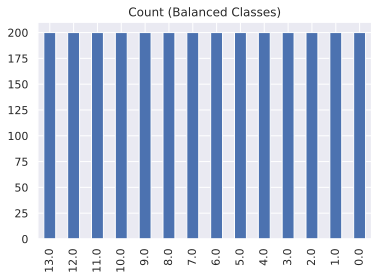

In [8]:
print("Balanced Different Classes",target.value_counts())
target.value_counts().plot(kind='bar', title='Count (Balanced Classes)');


In [9]:
[X_train, X_test, y_train, y_test] = train_test_split(data, target, test_size=0.3, random_state=10, stratify=target)


In [10]:
from keras.utils import to_categorical

print("--- X ---")
X = pd.DataFrame(X_train)
X_train=X
print(X.head())
print(X.info())

print("--- Y ---")
y = pd.DataFrame(y_train)
y = to_categorical(y)
print(y.shape)
y_train=y

print("--- testX ---")
testX = pd.DataFrame(X_test)
print(testX.head())
print(testX.info())
X_test=testX

print("--- testy ---")
testy = pd.DataFrame(y_test)
testy = to_categorical(testy)
y_test=testy

Using TensorFlow backend.


--- X ---
           2         3         4         5         6         7         8     \
71182  0.121990  0.048449  0.011679 -0.043476 -0.135401 -0.208941 -0.227326   
33165  2.685123  2.614532  2.487467  2.430993  2.360402  2.318047  2.261573   
33108 -0.265610 -0.251491 -0.265610 -0.293846 -0.293846 -0.223255 -0.180899   
51764  1.039272  0.787629  0.544104  0.300578  0.089523 -0.105298 -0.292001   
40801 -2.845573 -2.922145 -2.883859 -2.749858 -2.539285 -2.328712 -2.137281   

           9         10        11    ...  3191  3192  3193  3194  3195  3196  \
71182 -0.300866 -0.319251 -0.356021  ...   0.0   0.0   0.0   0.0   0.0   0.0   
33165  2.120390  1.908615  1.682721  ...   0.0   0.0   0.0   0.0   0.0   0.0   
33108 -0.138544 -0.082071 -0.011479  ...   0.0   0.0   0.0   0.0   0.0   0.0   
51764 -0.511174 -0.746582 -0.998225  ...   0.0   0.0   0.0   0.0   0.0   0.0   
40801 -1.869279 -1.696992 -1.505562  ...   0.0   0.0   0.0   0.0   0.0   0.0   

       3197  3198  3199  3200  
71

In [11]:
print(X.shape)
print(y.shape)
print(testX.shape)
print(testy.shape)


(1960, 3199)
(1960, 14)
(840, 3199)
(840, 14)


In [12]:
from keras import backend as K
    
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.
        Only computes a batch-wise average of recall.
        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall
 
    def precision(y_true, y_pred):
        """Precision metric.
        Only computes a batch-wise average of precision.
        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [14]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Input, Flatten, SeparableConv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model

from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

from imblearn.keras import BalancedBatchGenerator
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler


In [15]:
X = np.expand_dims(X,2)
testX = np.expand_dims(testX,2)
n_obs, feature, depth = X.shape
batch_size = 1024

In [16]:
def build_model():
    input_img = Input(shape=(feature, depth), name='ImageInput')
    x = Conv1D(64, 3, activation='relu', padding='same', name='Conv1_1')(input_img)
    x = Conv1D(64, 3, activation='relu', padding='same', name='Conv1_2')(x)
    x = MaxPooling1D(2, name='pool1')(x)
    
    x = SeparableConv1D(64, 3, activation='relu', padding='same', name='Conv2_1')(x)
    x = SeparableConv1D(64, 3, activation='relu', padding='same', name='Conv2_2')(x)
    x = MaxPooling1D(2, name='pool2')(x)
    
    x = SeparableConv1D(128, 3, activation='relu', padding='same', name='Conv3_1')(x)
    x = BatchNormalization(name='bn1')(x)
    x = SeparableConv1D(128, 3, activation='relu', padding='same', name='Conv3_2')(x)
    x = BatchNormalization(name='bn2')(x)
    
    x = SeparableConv1D(256, 3, activation='relu', padding='same', name='Conv3_3')(x)
    x = MaxPooling1D(2, name='pool3')(x)
    x = Dropout(0.6, name='dropout0')(x)
    
    x = Flatten(name='flatten')(x)
    x = Dense(256, activation='relu', name='fc1')(x)
    x = Dropout(0.6, name='dropout1')(x)
    x = Dense(128, activation='relu', name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)
    x = Dense(14, activation='softmax', name='fc3')(x)
    
    model = Model(inputs=input_img, outputs=x)
    return model

In [17]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 



Instructions for updating:
non-resource variables are not supported in the long term


In [18]:
model =  build_model()

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ImageInput (InputLayer)      (None, 3199, 1)           0         
_________________________________________________________________
Conv1_1 (Conv1D)             (None, 3199, 64)          256       
_________________________________________________________________
Conv1_2 (Conv1D)             (None, 3199, 64)          12352     
_________________________________________________________________
pool1 (MaxPooling1D)         (None, 1599, 64)          0         
_________________________________________________________________
Conv2_1 (SeparableConv1D)    (None, 1599, 64)          4352      
_________________________________________________________________
Conv

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc',f1])

In [20]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="/tmp/weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
history = model.fit(X, y, validation_split=0.3,epochs=5,batch_size=batch_size,shuffle=True,class_weight='auto',callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.
Train on 1372 samples, validate on 588 samples
Epoch 1/5


In [22]:
print("Evaluation: ")
mse, acc, F1 = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)
print('F1:', F1)
model.save('rhythm-01ep05.h5')

Evaluation: 
8400/8400 [==============================] - 14s 2ms/step
mean_squared_error : 0.20232977349488507
accuracy: 0.9466666666666667
F1: 0.9466145022710164


In [23]:
model.save_weights("rhythm_mod01.h5")
print("Saved model01 to disk")

model_json = model.to_json()
with open("rhythm_mod01.json", "w") as json_file:
    json_file.write(model_json)

Saved model01 to disk


In [24]:
y_pred = model.predict(testX, batch_size=1000)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

print(classification_report(testy.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       600
           1       0.99      1.00      1.00       600
           2       0.86      0.82      0.84       600
           3       0.87      0.93      0.90       600
           4       0.92      0.89      0.90       600
           5       0.99      1.00      0.99       600
           6       0.83      0.92      0.87       600
           7       0.99      0.99      0.99       600
           8       0.95      0.98      0.97       600
           9       0.97      1.00      0.98       600
          10       1.00      1.00      1.00       600
          11       0.99      0.98      0.99       600
          12       1.00      0.99      0.99       600
          13       0.96      0.99      0.98       600

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



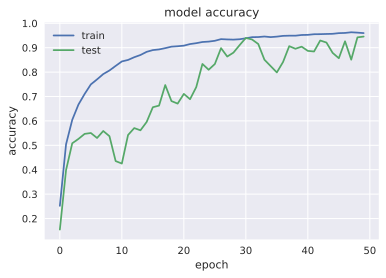

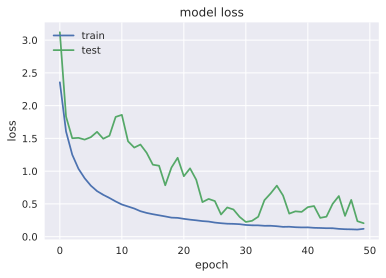

In [26]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
model.save('rythmcnn01.h5')

In [22]:
for layer in model.layers:
    weights = layer.get_weights() 

In [50]:
import pandas as pd 
pd.DataFrame(history.history['acc']).to_csv("acc.csv")
pd.DataFrame(history.history['val_acc']).to_csv("val_acc.csv")
pd.DataFrame(history.history['loss']).to_csv("loss.csv")
pd.DataFrame(history.history['val_loss']).to_csv("val_loss.csv")

In [49]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




Normalized confusion matrix


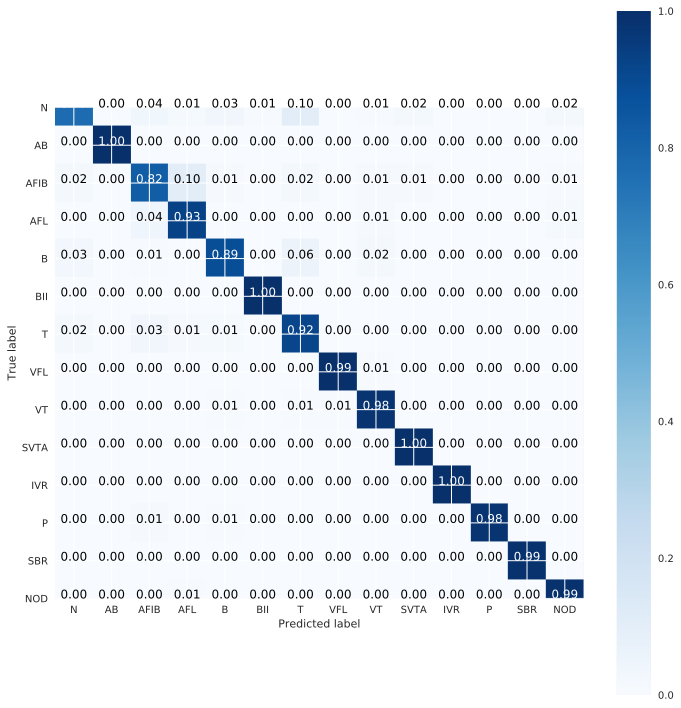

In [48]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(testy.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'AB','AFIB', 'AFL','B','BII', 'T', 'VFL','VT', 'SVTA', 'IVR', 'P', 'SBR', 'NOD' ])
plt.show()

In [26]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="/tmp/weights-aug.hdf5", monitor='val_f1', mode='max', verbose=1, save_best_only=True)

In [27]:
model.load_weights('/tmp/weights.hdf5')

In [34]:
sens = []

spec = []
acc = []

for each in range(0,14):
    match=sum(testy.argmax(axis=1)== y_pred.argmax(axis=1))
   
    sens.append( cnf_matrix[each, each] / sum( cnf_matrix[each, :]))
    spec.append((match -  cnf_matrix[each, each]) / ((match - cnf_matrix[each, each] + sum( cnf_matrix[:, each]) -  cnf_matrix[each, each])))
    
speci = pd.DataFrame(spec)
spec=speci[0]


macc=(sens+spec)/2

sens= np.array(sens)
sens=np.transpose(sens)


In [35]:
print('sensitivity',sens)
print(spec)
print(macc)  

sensitivity [0.77 1.   0.82 0.93 0.89 1.   0.92 0.99 0.98 1.   1.   0.98 0.99 0.99]
0     0.994029
1     0.999456
2     0.989782
3     0.988902
4     0.994106
5     0.999185
6     0.985357
7     0.999321
8     0.996212
9     0.997423
10    1.000000
11    0.999593
12    0.999864
13    0.996883
Name: 0, dtype: float64
0     0.880348
1     0.999728
2     0.905725
3     0.957784
4     0.939553
5     0.998759
6     0.951012
7     0.997160
8     0.988939
9     0.997045
10    1.000000
11    0.990630
12    0.995765
13    0.994275
Name: 0, dtype: float64


In [36]:
import pandas as pd 
  
# intialise data of lists. 
data = {'Sensitivity':sens, 'Specificty': spec} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
df 

,Sensitivity,Specificty
0,0.766667,0.994029
1,1.000000,0.999456
2,0.821667,0.989782
3,0.926667,0.988902
4,0.885000,0.994106
5,0.998333,0.999185
6,0.916667,0.985357
7,0.995000,0.999321
8,0.981667,0.996212
9,0.996667,0.997423


In [46]:
import pandas as pd 
  
# intialise data of lists. 
data = {'Sensitivity':sens, 'Specificty':spec,'MAcc':(sens+spec)/2} 
  
# Create DataFrame 
result = pd.DataFrame(data) 
  
# Print the output. 
result

,Sensitivity,Specificty,MAcc
0,0.810000,0.997284,0.903642
1,0.985000,0.997770,0.991385
2,0.976667,0.999344,0.988005
3,0.948333,0.998430,0.973381
4,1.000000,0.999080,0.999540
5,1.000000,0.999342,0.999671
6,0.970000,0.995816,0.982908
7,0.973333,0.995685,0.984509
8,1.000000,0.999474,0.999737
9,1.000000,0.995154,0.997577
